# HW5: Image classification with Convolutional Neural Networks (20 points)

For this assignment, you'll build simple convolutional neural networks using Keras for image classification tasks. The goal is to get you familiar with the steps of working with deep learning models, namely, preprocessing dataset, defining models, train/test models and quantatively comparing performances.
Make sure this notebook is launched in an environment with Numpy, Tensorflow, matplotlib and Keras installed. Refer
to: https://www.tutorialspoint.com/keras/keras_installation.htm if you need help with creating a virtual environment with all required dependencies. 

Furthermore, you can refer to the official Keras website for detailed documentations about different neural network layers (https://keras.io/api/layers/) and other classes.

In [6]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD
import numpy as np

## (1) Sample code (5 points)

As in class, we first download the MNIST dataset and get the train/test sets. We then process the data to be ready for training and testing.

In [7]:
# loading the dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
def process_dataset(trainX, trainY, testX, testY):
    # reshape features and normalize
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    trainX = trainX / 255.0
    testX = testX / 255.0
    # converting labels to one-hot encoding
    trainY = np_utils.to_categorical(trainY)
    testY = np_utils.to_categorical(testY)
    return trainX, trainY, testX, testY
trainX, trainY, testX, testY = process_dataset(trainX, trainY, testX, testY)

We then define the model. Similar to in-class demo, this model has 1 convolution layer with 32 filters, followed by one 
 2-by-2 MaxPooling layer. The output from MaxPooling layer is then flattened and goes through two linear layers, with 100 and 10 hidden
units respectively. We use Stochastic Gradient Descent as our optimizer, and we can adjust its learning rate.

In [9]:
def define_model(learning_rate):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  
    return model

Now we can train and evaulate the specified model. Here we're using the test set as the validation set for simplicity. 
However, to be more rigorous we often split the training dataset into train/validation sets and tune the hyperparameters using 
only the training dataset, and we test the model on the test set after figuring out the best hyperparameters.

In [10]:
# here we define a model with lr=0.01
model = define_model(0.01)
history = model.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4673 - accuracy: 0.8735 - val_loss: 0.2423 - val_accuracy: 0.9276
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2139 - accuracy: 0.9376 - val_loss: 0.1690 - val_accuracy: 0.9507
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1645 - accuracy: 0.9509 - val_loss: 0.1399 - val_accuracy: 0.9555
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1348 - accuracy: 0.9596 - val_loss: 0.1156 - val_accuracy: 0.9647
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1147 - accuracy: 0.9655 - val_loss: 0.1174 - val_accuracy: 0.9628
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1002 - accuracy: 0.9697 - val_loss: 0.0981 - val_accuracy: 0.9694
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0893 - accuracy: 0.9733 - val_loss: 0.0951 - val_a

Once training is completed, we can plot the train/validation losses and train/validation accuracies.

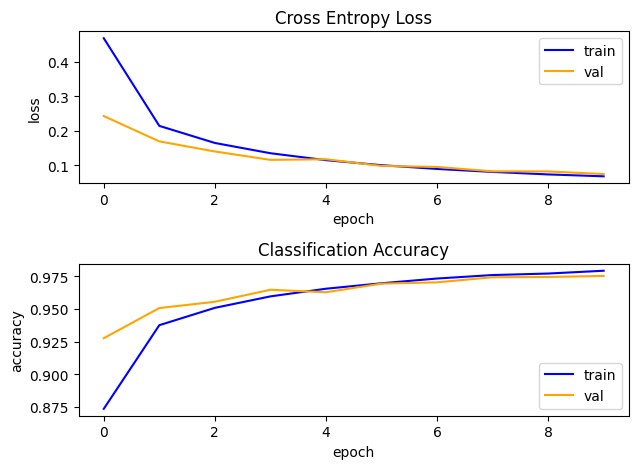

In [20]:
#plot loss
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend(('train','val'))
plt.xlabel('epoch')
plt.ylabel('loss')

# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend(('train','val'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
fig.tight_layout()
plt.show()

### Question 1 (5 points):

What do you observe in the above plots? What do you think might be the reason?

As we increase the number of epochs, we notice that our cross entropy loss decreases while the classification accuracy increases. By the end of the 10 epochs, we have achieved around 98% on both our training and validation set. This high accuracy for both datasets suggests that we have a robust model that generalizes well. Typically, as the cross entropy loss decreases towards 0, we expect the classification accuracy to increase towards 1 as low loss means we are approaching a minimum. As we increase the number of epochs, we achieve higher accuracy because the model is able to learn a more optimal set of weights by passing the entire training data through the network and backpropogating again.

## (2) Vary learning rates (5 points)

Recall from lecture that we update the weights of the neural network by first calculate the gradients with backpropagation from the loss $L$, then update the weights by $$ w = w - \eta*\frac{\partial L}{\partial w}$$
Here, $\eta$ is the learning rate and decides the step size of updates. Previously we used $\eta=0.01$. We want to see the effect of learning rate on the training process, therefore we would like to try two other choices of $\eta$. (1) $\eta=1$ (2) $\eta=$1e-5 (0.00001)

In [11]:
#### TODO 1 STARTS ###
model_eta_large = define_model(1)
history_eta_large = model_eta_large.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 1 ENDS ###

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 2.3079 - accuracy: 0.1076 - val_loss: 2.3109 - val_accuracy: 0.0892
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3091 - accuracy: 0.1042 - val_loss: 2.3039 - val_accuracy: 0.1028
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3083 - accuracy: 0.1041 - val_loss: 2.3105 - val_accuracy: 0.1010
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3083 - accuracy: 0.1062 - val_loss: 2.3200 - val_accuracy: 0.1010
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3088 - accuracy: 0.1050 - val_loss: 2.3098 - val_accuracy: 0.1032
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3084 - accuracy: 0.1042 - val_loss: 2.3037 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3087 - accuracy: 0.1039 - val_loss: 2.3125 - val_ac

In [12]:
#### TODO 2 STARTS ###
model_eta_small = define_model(0.00001)
history_eta_small = model_eta_small.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 2 ENDS ###

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3043 - accuracy: 0.0958 - val_loss: 2.2992 - val_accuracy: 0.0965
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.2940 - accuracy: 0.0971 - val_loss: 2.2889 - val_accuracy: 0.0990
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.2840 - accuracy: 0.1007 - val_loss: 2.2790 - val_accuracy: 0.1038
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.2743 - accuracy: 0.1080 - val_loss: 2.2694 - val_accuracy: 0.1137
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.2649 - accuracy: 0.1243 - val_loss: 2.2600 - val_accuracy: 0.1308
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.2557 - accuracy: 0.1510 - val_loss: 2.2508 - val_accuracy: 0.1624
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.2466 - accuracy: 0.1923 - val_loss: 2.2417 - val_ac

We now compare the training accuracy of the two above models with the training accuracy of the model in part 1.

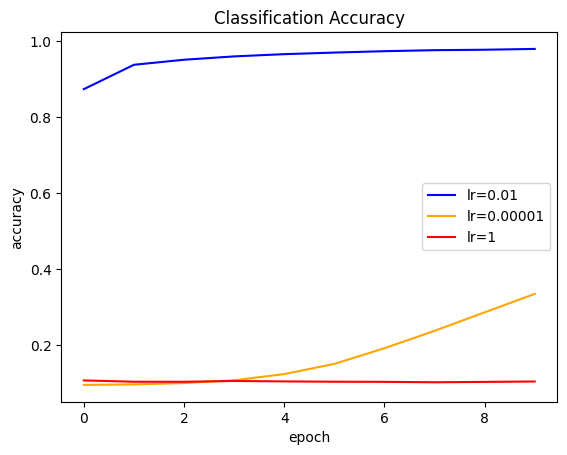

In [22]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_eta_small.history['accuracy'], color='orange')
plt.plot(history_eta_large.history['accuracy'], color='red')
plt.legend(('lr=0.01','lr=0.00001','lr=1'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Question 2 (5 points):

What do you observe by looking at the training accuracies above? Does the two other models with small and large learning
rates seem to be learning? What do you think might be the reason? (optional) Can you find a better learning rate than the baseline?

Both lr_small and lr_large result in very poor training classification accuracy, with around 33.5% and 10.5% accuracy respectively. With lr_large, it's likely that by taking such a large step in gradient descent, our update was too coarse-grained to ever converge towards a minima. On a graph, this would look like bouncing around a trough or escaping the minima entirely. On the other hand, lr_small performed better relative to lr_large, but the performance is poor. With too small of a learning rate, the steps towards the minima in gradient descent are so fine-grained that it takes too long to converge. The smaller the step, the more steps we will have to take to achieve convergence, and subsequently the more computational time (epochs) we would require. So in the case of lr_small, it does seem to be making progress towards minimizing the loss, but it is prohibitively slow.

With regard to the baseline learning rate, it does achieve considerably high performance, but there is still some room to improve. Learning rate is one of many factors in performance, but small tweaks to the learning rate could yield some improvement. It should also be considered that there are common values to set for hyperparameters such as this baseline, but it all depends on the data you're working with. Part of creating successful models is learning the art of tuning hyperparameters. With a model that requires performance improvements, after bugs and model architecture have been ruled out, it is a good idea to tweak hyperparameters.

## (3) Adding momentum (5 points)

Till now we have tried various learning rates with SGD. There are various ways to make SGD behave more intelligently, 
one of which is momentum. Intuitively, when SGD tries to descend down a valley (an analogy for the case 
where the gradient of one dimension is larger than gradient of another dimension), SGD might bounce between the walls of the valley instead of descending along the valley. This makes SGD converge slower or even stuck. Momentum works by dampening the oscillations of SGD and encourages it to follow a smoother path. Formally, SGD with momentum update weights by the following way:

$$z^{k+1} = \beta z^{k} + \frac{\partial L}{\partial w^k}$$
$$w^{k+1} = w^{k} - \eta*z^{k+1}$$

Here $\beta$ is the momentum and is between 0 and 1. The official documentation of SGD details how to specify momentum (https://keras.io/api/optimizers/sgd/). If you want to learn more about momentum, this post might be helpful: https://distill.pub/2017/momentum/

Please define a model with learning rate 0.01 and momentum 0.9, then compare it to the baseline in part 1.

In [14]:
def define_model_with_momentum(learning_rate,momentum):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    #### TODO 3 STARTS ###
    opt = SGD(lr=learning_rate,momentum=momentum)
    #### TODO 3 ENDS ###
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  
    return model

In [15]:
#### TODO 4 STARTS ###
model_momentum = define_model_with_momentum(0.01,0.9)
history_momentum = model_momentum.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 4 ENDS ###

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1875/1875 [==============================] - 15s 8ms/step - loss: 0.2372 - accuracy: 0.9281 - val_loss: 0.0942 - val_accuracy: 0.9709
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0794 - accuracy: 0.9760 - val_loss: 0.0642 - val_accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0516 - accuracy: 0.9841 - val_loss: 0.0557 - val_accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0462 - val_accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0484 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.0464 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.0429 - val_accuracy: 0.9

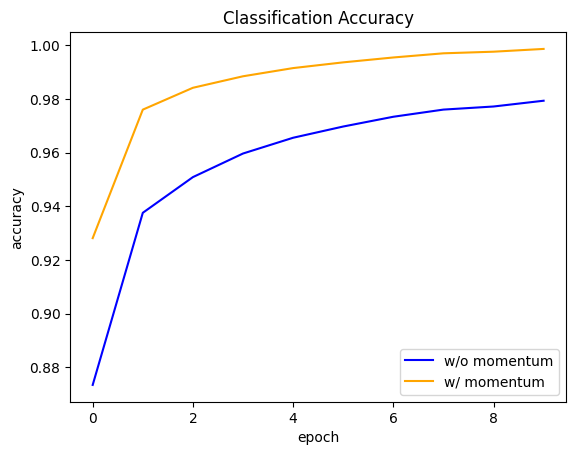

In [16]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_momentum.history['accuracy'], color='orange')
plt.legend(('w/o momentum','w/ momentum'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Question 3 (5 points):

What do you observe in the plot? Does momentum improves training?

From the plot, we observe that momentum does considerably improve training; w/ momentum achieves 0.9986 training accuracy and w/o momentum achieves 0.9793 training accuracy. Momentum smooths out gradient updates by taking the exponentially weighted average of past gradients. It's likely that by smoothing out these oscillations, gradient descent was able to converge faster, achieving higher classification accuracy at the end of training.

## (4) Adding convolution layers (5 points)

To increase model capacity (the ability to fit more complex dataset), one way is to adding layers to the model. In part 
1, the model given to you has the following layers before the final 2 dense layers:
    
(1) 2D convolution with 32 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer 

(2) Flatten layer

In the function below, please implement a model with the following layers (in this order):

(1) 2D convolution with 32 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer 

(1) 2D convolution with 64 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer 

(2) Flatten layer

In [17]:
def define_model_2_conv(learning_rate):
    model = Sequential()
    #### TODO 5 STARTS ###
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    #### TODO 5 ENDS ###
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  
    return model

In [18]:
# define model and train
#### TODO 6 STARTS ###
model_2_layer = define_model_2_conv(0.01)
history_2_layer = model_2_layer.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 6 ENDS ###

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1875/1875 [==============================] - 26s 14ms/step - loss: 0.5016 - accuracy: 0.8512 - val_loss: 0.1545 - val_accuracy: 0.9539
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1437 - accuracy: 0.9566 - val_loss: 0.0911 - val_accuracy: 0.9721
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0987 - accuracy: 0.9700 - val_loss: 0.0734 - val_accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0789 - accuracy: 0.9758 - val_loss: 0.0661 - val_accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0660 - accuracy: 0.9793 - val_loss: 0.0589 - val_accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0575 - accuracy: 0.9821 - val_loss: 0.0513 - val_accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0452 - val_accura

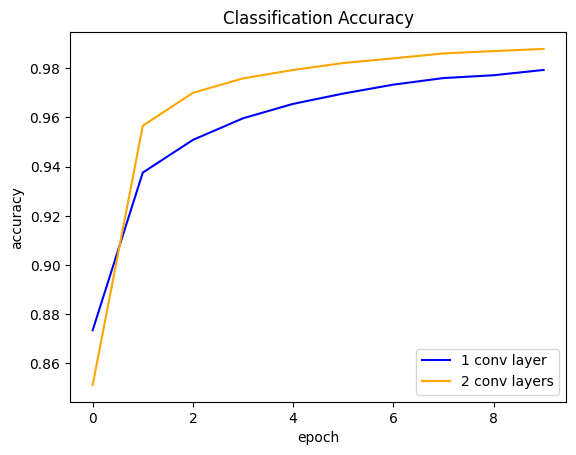

In [19]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_2_layer.history['accuracy'], color='orange')
plt.legend(('1 conv layer','2 conv layers'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Question 4 (5 points):

What do you observe in the plot? Does adding a covolutional layer improves training set accuracy? What might be
the reason to the improvement if there are any?

We can observe that adding a second layer did result in an improvement with 1 convolutional layer achieving 0.9793 training accuracy and 2 convolutional layers achieving 0.9878 training accuracy. There are multiple possible explanations for the improvement, but some likely reasons would be higher model complexity or better feature extraction. By adding another layer to the CNN, we increase the number of parameters, which typically makes our model more expressive. Adding another layer can also enable more sophisticated features to be extracted. With each convolutional layer, we extract image features such as the edges of numbers. So by adding another layer, this gives us an opportuntiy to extract more intricate features from the images that could help in distinguishing between classes.